In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from safetensors import safe_open

In [2]:
scores_35M = {}
scores_150M = {}
scores_650M = {}
scores_3B = {}

with safe_open(
    "../analyses/facebook/esm2_t12_35M_UR50D_yeast_seed=0/scores_facebook/esm2_t12_35M_UR50D_yeast/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_35M[k] = f.get_tensor(name=k)

with safe_open(
    "../analyses/facebook/esm2_t30_150M_UR50D_yeast_seed=0/scores_facebook/esm2_t30_150M_UR50D_yeast/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_150M[k] = f.get_tensor(name=k)


with safe_open(
    "../analyses/facebook/esm2_t33_650M_UR50D_yeast_seed=0/scores_facebook/esm2_t33_650M_UR50D_yeast/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_650M[k] = f.get_tensor(name=k)

with safe_open(
    "../analyses/facebook/esm2_t36_3B_UR50D_yeast_seed=0/scores_facebook/esm2_t36_3B_UR50D_yeast/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_3B[k] = f.get_tensor(name=k)

In [3]:
df = pd.read_csv("../DMS_substitutions.csv")
df = df[df["DMS_id"] == "GCN4_YEAST_Staller_2018"]
seq = df.iloc[0]['target_seq']
df = pd.read_csv("../studies/GCN4_YEAST_Staller_2018.csv")
df['mutations'] = df['mutant'].map(lambda x: x.count(":") + 1)
df["influence_35M"] = scores_35M["all_modules"].numpy().flatten()
df["influence_150M"] = scores_150M["all_modules"].numpy().flatten()
df["influence_650M"] = scores_650M["all_modules"].numpy().flatten()
df["influence_3B"] = scores_3B["all_modules"].numpy().flatten()
df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,mutations,influence_35M,influence_150M,influence_650M,influence_3B
0,D103A,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.543932,1,1,1.362313e+06,5637205.0,17440918.0,36974408.0
1,D103A:F108N:K118D:S122Q:V135I:D139W,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.158042,0,6,1.099066e+06,4627598.0,15137058.0,31673806.0
2,D103A:S104T:T105I:P106T:M107L:F108T:E109S:N112...,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.391235,1,35,8.979669e+05,3912463.0,12406013.0,22435916.0
3,D103A:S122A:V130Q:T132M:S144N,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.243840,0,5,1.262022e+06,5308819.5,16416499.0,34875740.0
4,D103A:S122E:S136P:K140S:A141R,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.678492,1,5,1.277582e+06,5255582.5,16556533.0,34974316.0
...,...,...,...,...,...,...,...,...,...
2633,Y110V:S136Q:L137P:A141L,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.667499,1,4,1.349448e+06,5638232.0,17869766.0,36497344.0
2634,Y110W:I128E:T131K:V135C:L137C,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.267964,0,5,1.230842e+06,5126975.5,16097787.0,35218572.0
2635,Y110W:L113N:S122A:D134Y:I142E:S144L,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.213463,0,6,1.214151e+06,5096845.0,16311007.0,34969140.0
2636,Y110W:N116D:S117P:D127M,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,1.190297,0,4,1.262028e+06,5004524.5,15636253.0,33624344.0


In [4]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp
hex_list = [
    "#631E59",
    "#77277E",
    "#7B2F99",
    "#7738B4",
    "#6B40CF",
    "#5749EA",
    "#4A61E9",
    "#4C85E7",
    "#4DA8E6",
    "#4FC9E4",
    "#50E3DC",
]

/home/cadegord/miniconda3/envs/bio-if/lib/python3.9/site-packages/seaborn/relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/cadegord/miniconda3/envs/bio-if/lib/python3.9/site-packages/seaborn/relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/cadegord/miniconda3/envs/bio-if/lib/python3.9/site-packages/seaborn/re

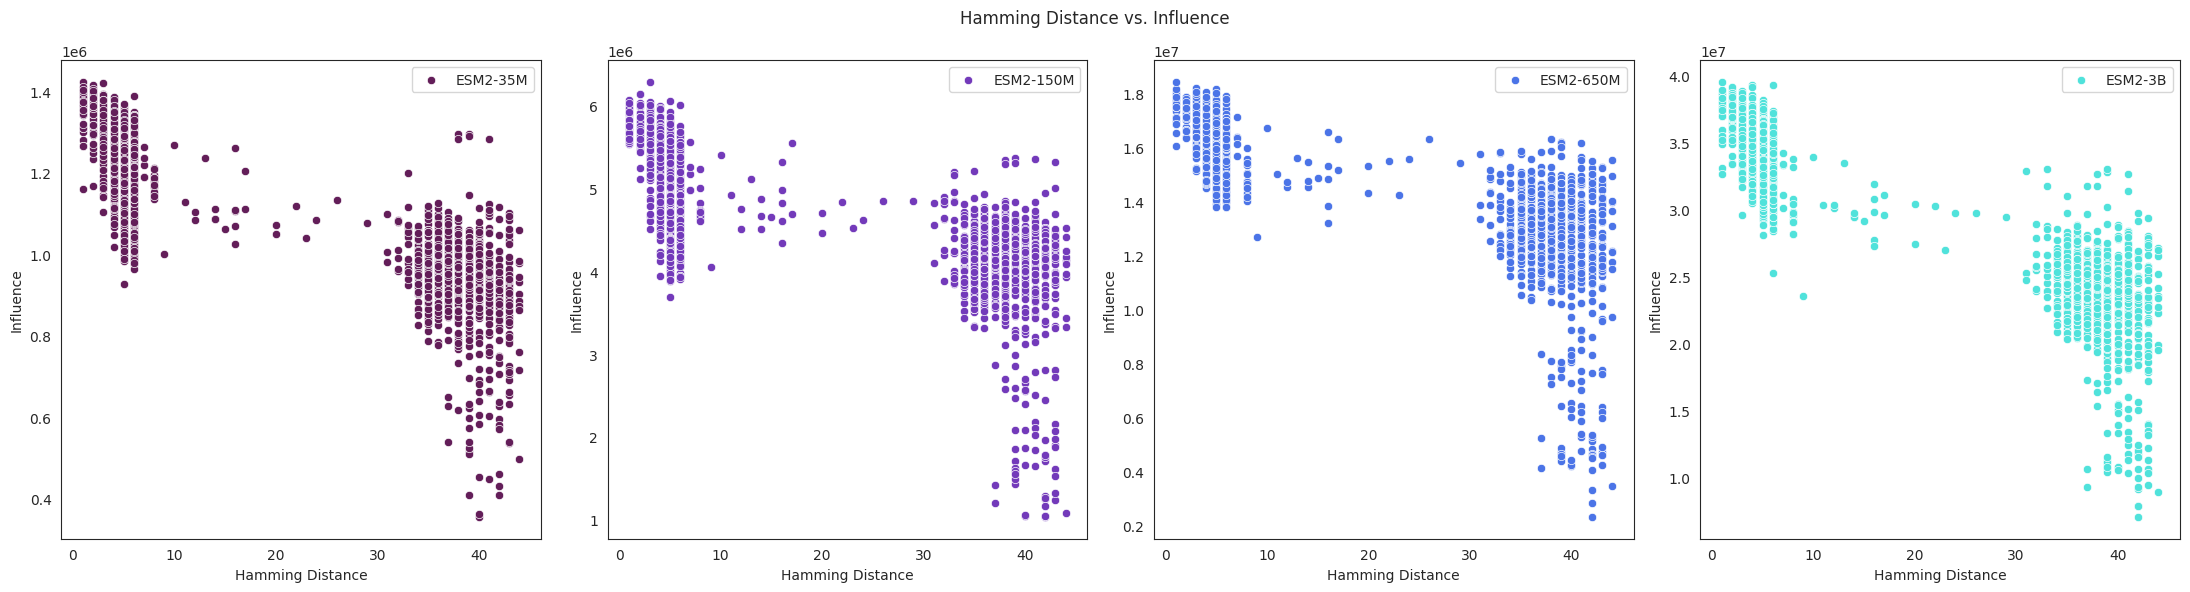

In [6]:
# cmap = plt.get_cmap("plasma")
cmap = get_continuous_cmap(hex_list)
plt.figure(figsize=(22, 6))
sns.set_style("white")
plt.suptitle("Hamming Distance vs. Influence")
sizes = np.log(np.array([35, 150, 650, 3000]))
sizes -= sizes.min()
sizes /= sizes.max() + 1e-3

N = 4

# First subplot
plt.subplot(1, N, 1)
plt.xlabel("Hamming Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="mutations", y="influence_35M", label="ESM2-35M", c=cmap(sizes[0]))
plt.legend()

# Second subplot
plt.subplot(1, N, 2)
plt.xlabel("Hamming Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="mutations", y="influence_150M", label="ESM2-150M", c=cmap(sizes[1]))
plt.legend()

# Third subplot
plt.subplot(1, N, 3)
plt.xlabel("Hamming Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="mutations", y="influence_650M", label="ESM2-650M", c=cmap(sizes[2]))

# Fourth subplot
plt.subplot(1, 4, 4)
plt.xlabel("Hamming Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="mutations", y="influence_3B", label="ESM2-3B", c=cmap(sizes[3]))

plt.tight_layout()
plt.savefig("self-self-plots.pdf")

In [7]:
import blosum
blosum62 = blosum.BLOSUM(62)

In [8]:
seqs = df['mutated_sequence'].tolist()
blosum_scores = [
    sum([blosum62[seq[j]][seqs[i][j]] for j in range(len(seq))]) / len(seq) for i in range(len(df))
]

In [9]:
df["blosum62"] = blosum_scores

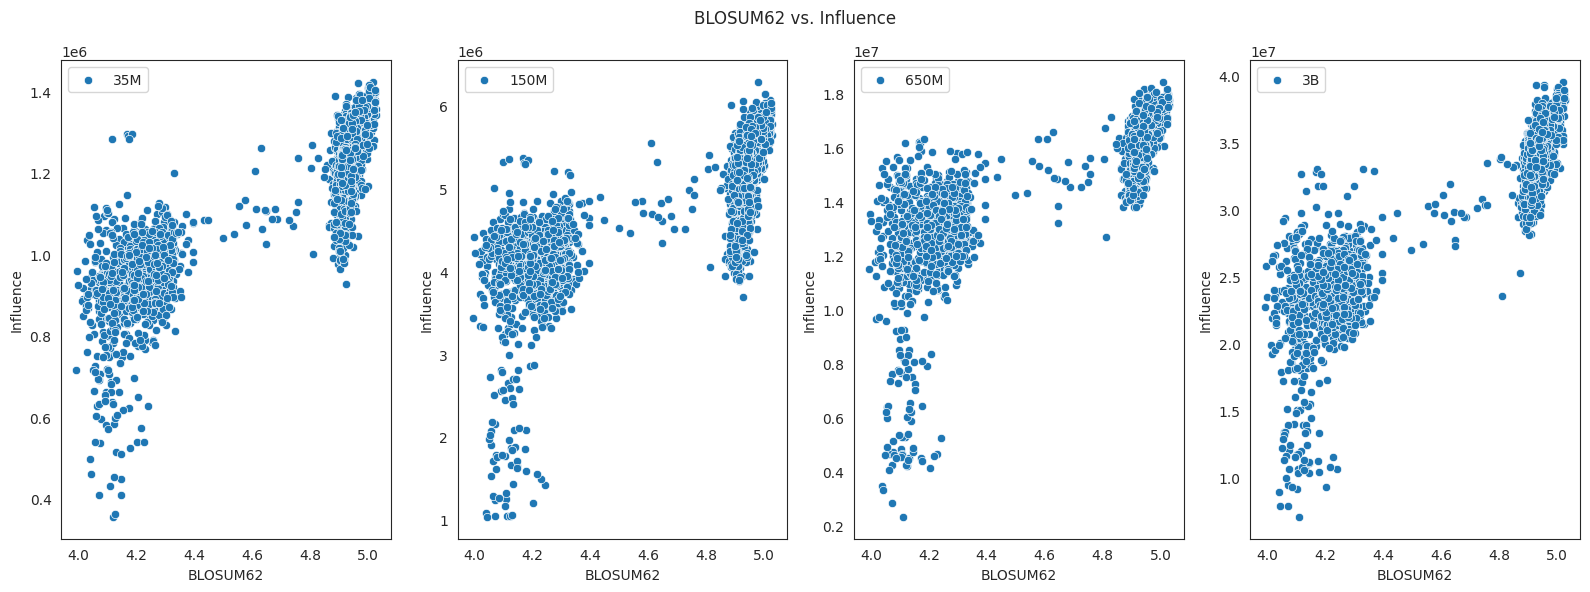

In [11]:
plt.figure(figsize=(16, 6))
sns.set_style("white")
plt.suptitle("BLOSUM62 vs. Influence")

N = 4

# First subplot
plt.subplot(1, N, 1)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="blosum62", y="influence_35M", label="35M")
plt.legend()
    
# Second subplot
plt.subplot(1, N, 2)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="blosum62", y="influence_150M", label="150M")
plt.legend()

# Third subplot
plt.subplot(1, N, 3)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="blosum62", y="influence_650M", label="650M")

# Fourth subplot
plt.subplot(1, 4, 4)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df, x="blosum62", y="influence_3B", label="3B")


plt.tight_layout()
plt.show()

In [12]:
# compute spearman and pearsons
from scipy.stats import spearmanr, pearsonr

correlations = {}

# df_alt = df[df['mutations'] < 10]
df_alt = df

correlations["hamming_35M"] = spearmanr(df_alt["mutations"], df_alt["influence_35M"])
correlations["hamming_150M"] = spearmanr(df_alt["mutations"], df_alt["influence_150M"])
correlations["hamming_650M"] = spearmanr(df_alt["mutations"], df_alt["influence_650M"])
correlations["hamming_3B"] = spearmanr(df["mutations"], df["influence_3B"])
correlations["blosum_35M"] = spearmanr(df_alt["blosum62"], df_alt["influence_35M"])
correlations["blosum_150M"] = spearmanr(df_alt["blosum62"], df_alt["influence_150M"])
correlations["blosum_650M"] = spearmanr(df_alt["blosum62"], df_alt["influence_650M"])
correlations["blosum_3B"] = spearmanr(df["blosum62"], df["influence_3B"])

correlations


{'hamming_35M': SignificanceResult(statistic=-0.8374325591317668, pvalue=0.0),
 'hamming_150M': SignificanceResult(statistic=-0.7997031752713384, pvalue=0.0),
 'hamming_650M': SignificanceResult(statistic=-0.8295322245066242, pvalue=0.0),
 'hamming_3B': SignificanceResult(statistic=-0.8428502737747593, pvalue=0.0),
 'blosum_35M': SignificanceResult(statistic=0.8500007138626849, pvalue=0.0),
 'blosum_150M': SignificanceResult(statistic=0.823728280353432, pvalue=0.0),
 'blosum_650M': SignificanceResult(statistic=0.8494029931960303, pvalue=0.0),
 'blosum_3B': SignificanceResult(statistic=0.8729161675173257, pvalue=0.0)}

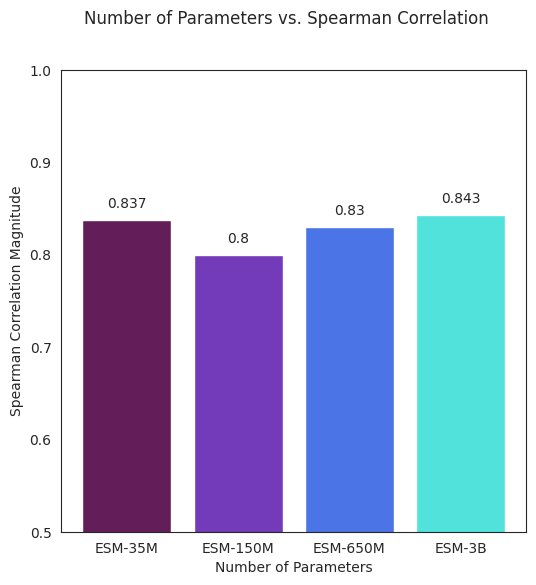

In [14]:
# plot number of parameters vs. hamming distance spearman
plt.figure(figsize=(6, 6))
sns.set_style("white")
plt.suptitle("Number of Parameters vs. Spearman Correlation")
sizes = np.array([35e6, 150e6, 650e6, 3e9])
sizes_text = ["ESM-35M", "ESM-150M", "ESM-650M", "ESM-3B"]
sizes_color_values = np.log(sizes)
sizes_color_values -= sizes_color_values.min()
sizes_color_values /= sizes_color_values.max() + 1e-3
spearmans = -np.array([
    correlations["hamming_35M"].correlation,
    correlations["hamming_150M"].correlation,
    correlations["hamming_650M"].correlation,
    correlations["hamming_3B"].correlation
])
plt.bar(sizes_text, spearmans, color=cmap(sizes_color_values))
# place the correlation numbers above each bar
for i, v in enumerate(spearmans):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')

plt.xlabel("Number of Parameters")
plt.ylabel("Spearman Correlation Magnitude")
plt.ylim(0.5,1)
plt.savefig("params-spearman.pdf")

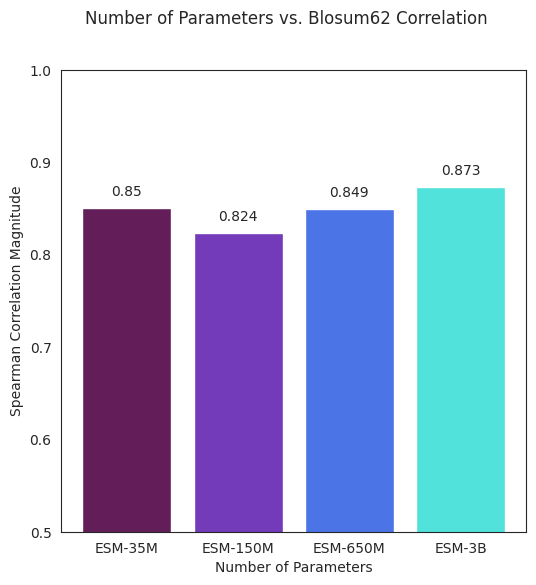

In [17]:
# plot number of parameters vs. blosum distance spearman
plt.figure(figsize=(6, 6))
sns.set_style("white")
plt.suptitle("Number of Parameters vs. Blosum62 Correlation")
sizes = np.array([35e6, 150e6, 650e6, 3e9])
sizes_text = ["ESM-35M", "ESM-150M", "ESM-650M", "ESM-3B"]
sizes_color_values = np.log(sizes)
sizes_color_values -= sizes_color_values.min()
sizes_color_values /= sizes_color_values.max() + 1e-3
spearmans = np.array([
    correlations["blosum_35M"].correlation,
    correlations["blosum_150M"].correlation,
    correlations["blosum_650M"].correlation,
    correlations["blosum_3B"].correlation
])
plt.bar(sizes_text, spearmans, color=cmap(sizes_color_values))
# place the correlation numbers above each bar
for i, v in enumerate(spearmans):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')

plt.xlabel("Number of Parameters")
plt.ylabel("Spearman Correlation Magnitude")
plt.ylim(0.5,1)
plt.savefig("params-spearman.pdf")

<Axes: xlabel='Hamming Distance', ylabel='BLOSUM62'>

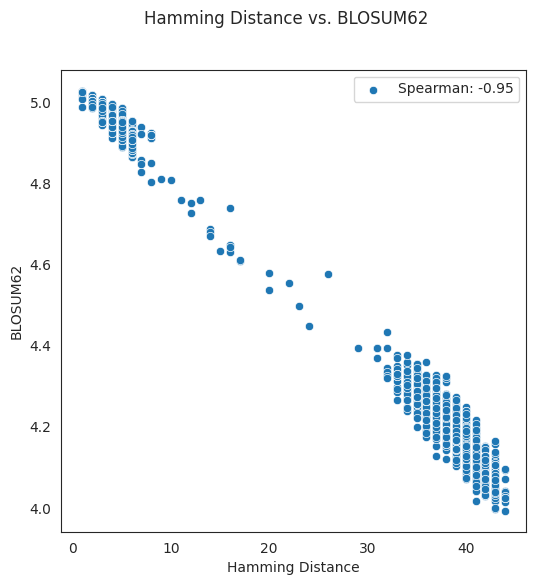

In [15]:
# plot hamming vs blosum and print its correlation
plt.figure(figsize=(6, 6))
sns.set_style("white")
plt.suptitle("Hamming Distance vs. BLOSUM62")

plt.xlabel("Hamming Distance")
plt.ylabel("BLOSUM62")
sns.scatterplot(data=df, x="mutations", y="blosum62", label=f"Spearman: {spearmanr(df['mutations'], df['blosum62'])[0]:.2f}")